In [174]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [5]:
df_exploded = df.explode('job_skills')
df_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [6]:
df_exploded.groupby('job_skills').size()

job_skills
airflow       2002
airtable        88
alteryx       4570
angular        376
angular.js       2
              ... 
wrike           39
wsl             16
xamarin          2
yarn            76
zoom           465
Length: 235, dtype: int64

In [8]:
#need to get specific aggregations:
df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'), #skill_count is the new column, job_skills is the column of interest, and count is the agg
    median_salary=('salary_year_avg', 'median') #median_salary is the new column, salary_year_avg is the column of interest, and median is the agg 
)

,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [11]:
#we can set all of this to a variable to be used/manipulated
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'), #skill_count is the new column, job_skills is the column of interest, and count is the agg
    median_salary=('salary_year_avg', 'median') #median_salary is the new column, salary_year_avg is the column of interest, and median is the agg 
) 

skill_stats #this will allow us to sort

skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

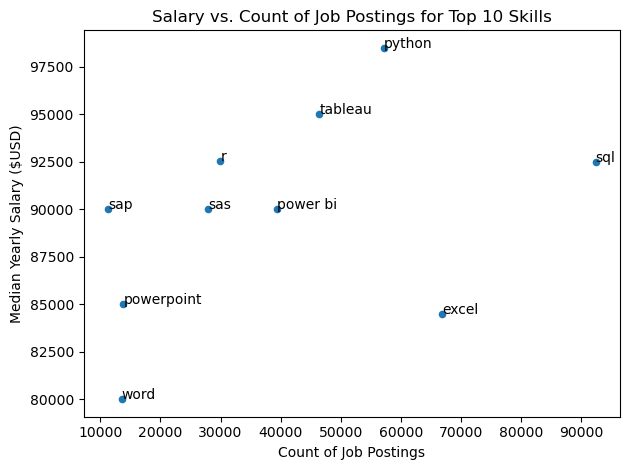

In [16]:
#we can now plot the above:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

#need to create a loop for lables in the plot
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()

🟨 Median Yearly Salary vs. Job Count (2.15.1) - Problem
Matplotlib Scatter Plots
Problem Statement:
Create a scatter plot to compare the median yearly salary and the number of jobs based on the job_title_short column.
To create the scatter plot first create a new DataFrame using the groupby() method to aggregate and find the median salary and job count for each job title.
Annotate each point with the job title name.

In [24]:
df = df.copy()
print(len(df))

785741


In [32]:
job_stats = df.groupby('job_title_short').agg(
    median_salary=('salary_year_avg', 'median'),
    job_count=('job_title_short', 'count')
).dropna() #add dropna

job_stats

,median_salary,job_count
job_title_short,,
Business Analyst,85000.0,49063
Cloud Engineer,90000.0,12331
Data Analyst,90000.0,196075
Data Engineer,125000.0,186241
Data Scientist,127500.0,172286
Machine Learning Engineer,106415.0,14080
Senior Data Analyst,111175.0,29216
Senior Data Engineer,147500.0,44563
Senior Data Scientist,155500.0,36957


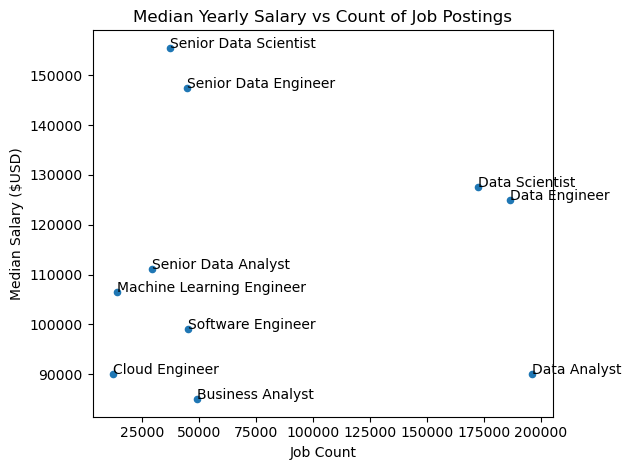

In [30]:
job_stats.plot(kind='scatter', x='job_count', y='median_salary')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('Job Count')
plt.title('Median Yearly Salary vs Count of Job Postings')

#need to create a loop for lables in the plot
for i, txt in enumerate(job_stats.index):
    plt.text(job_stats['job_count'].iloc[i], job_stats['median_salary'].iloc[i], txt)

plt.tight_layout()
plt.show()

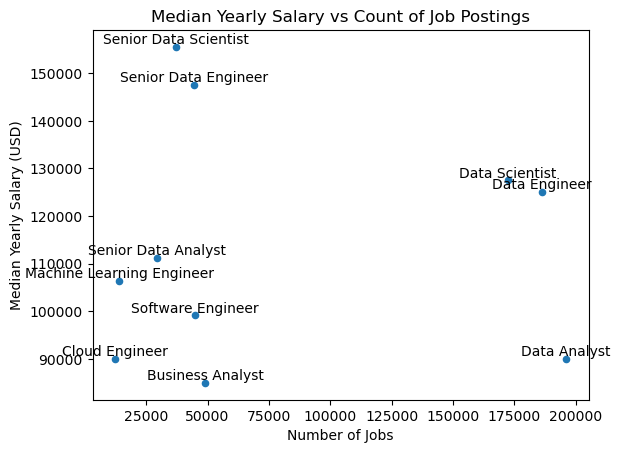

In [31]:
#Final Solution:

# Group data by job title and calculate average yearly salary and job count
job_title_stats = df.groupby('job_title_short').agg(
 median_salary_year_avg=('salary_year_avg', 'median'),
 job_count=('job_title_short', 'count')
).dropna()

# Plotting the results
job_title_stats.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

# Adding job title labels to each point
for i in range(len(job_title_stats)):
 job_count = job_title_stats['job_count'].iloc[i]
 mean_salary = job_title_stats['median_salary_year_avg'].iloc[i]
 job_title = job_title_stats.index[i]
 plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

plt.show()

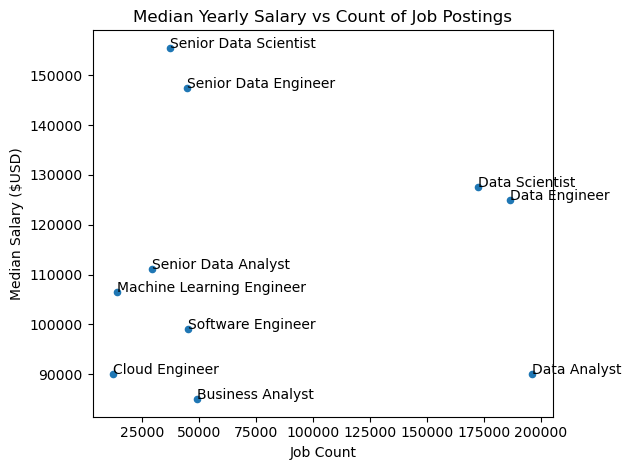

In [35]:
job_stats.plot(kind='scatter', x='job_count', y='median_salary')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('Job Count')
plt.title('Median Yearly Salary vs Count of Job Postings')

#need to create a loop for lables in the plot
#for i, txt in enumerate(job_stats.index):
#    plt.text(job_stats['job_count'].iloc[i], job_stats['median_salary'].iloc[i], txt)

for i in range(len(job_stats)):
    job_count = job_stats['job_count'].iloc[i]
    median_salary = job_stats['median_salary'].iloc[i]
    job_title = job_stats.index[i] #does not have to be job title, the variable can be whatever you want
    plt.text(job_count, median_salary, job_title)


plt.tight_layout()
plt.show()

🟨 Top 7 Countries by Median Yearly Salary vs Job Count (2.15.2) - Problem
Matplotlib Scatter Plots
Problem Statement:
Create a scatter plot to visualize the relationship between the number of job postings and median yearly salary for the top 7 countries based on highest number of job postings. Annotate each point with the country's name.

In [37]:
df = df.copy()
df.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [42]:
country_stats = df.groupby('job_country').agg(
    median_salary=('salary_year_avg', 'median'),
    job_postings=('job_title_short', 'count')
).dropna()

country_stats = country_stats.sort_values(by='job_postings', ascending=False).head(7)

country_stats



,median_salary,job_postings
job_country,,
United States,119187.5,206292
India,111175.0,51088
United Kingdom,104668.0,40375
France,97444.0,39922
Germany,111175.0,27694
Spain,98391.5,25100
Singapore,100500.0,23696


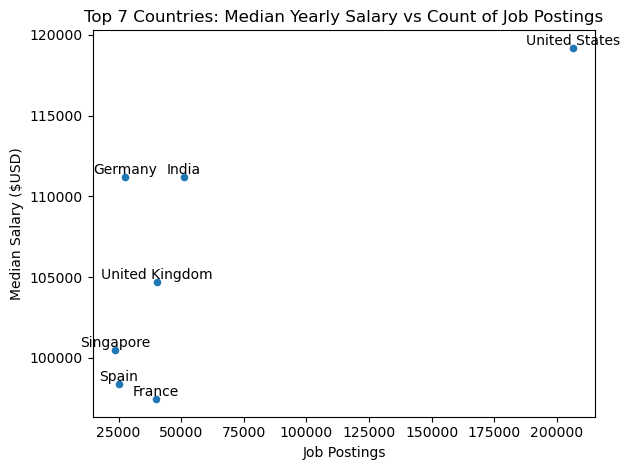

In [45]:
country_stats.plot(kind='scatter', x='job_postings', y='median_salary')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('Job Postings')
plt.title('Top 7 Countries: Median Yearly Salary vs Count of Job Postings')

for i in range(len(country_stats)):
    job_postings = country_stats['job_postings'].iloc[i]
    median_salary = country_stats['median_salary'].iloc[i]
    country_name = country_stats.index[i] #does not have to be job title, the variable can be whatever you want
    plt.text(job_postings, median_salary, country_name, ha='center', va='bottom')

plt.tight_layout()
plt.show()

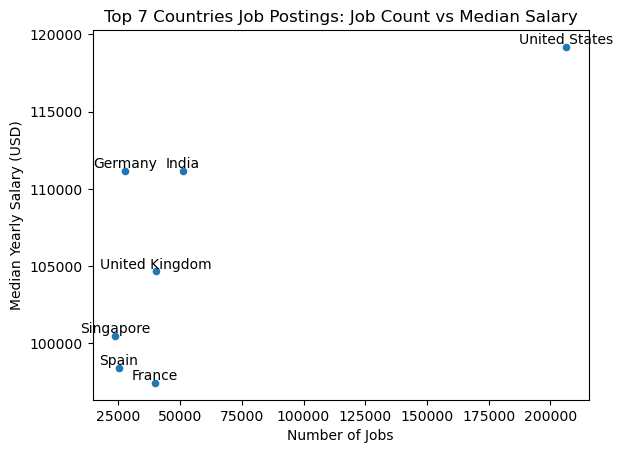

In [46]:
#Final Solution:
# Group data by country and calculate median hourly salary and job count
country_stats = df.groupby('job_country').agg(
 median_salary_year_avg=('salary_year_avg', 'median'),
 job_count=('job_country', 'count')
).dropna()

# Sort by job count in descending order and take the top 7
top_countries = country_stats.sort_values(by='job_count', ascending=False).head(7)

# Plotting the results
top_countries.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

# Adding country labels to each point
for i in range(len(top_countries)):
 job_count = top_countries['job_count'].iloc[i]
 mean_salary = top_countries['median_salary_year_avg'].iloc[i]
 country = top_countries.index[i]
 plt.text(job_count, mean_salary, country, ha='center', va='bottom')

plt.show()


🟥 Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3) - Problem
Matplotlib Scatter Plots
Problem Statement:
Create a scatter plot to visualize the relationship between the average yearly salary and the job count filtering a DataFrame for:
Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
United States for the job_country
'Full-time' and 'Contractor' for the job_schedule_type
Remove roles that do not have any yearly salary data.
Combine the job_title_short and job_schedule_type into one column (called job_title_type) in the newly created DataFrame to use as the labels for the plot.
For the plot use a for loop to cycle through the unique values in job_title_type and plot using the plt.scatter() function, specifying the label of job_title_type.
Ensure the legend is appearing.
Label the plot's axis and title appropriately.
Code Needed:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

In [175]:
df_filter = df[(df['job_country'] == 'United States') & (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) & (df['job_title_short'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer']))].copy()
df_filter.head(5)
df_filter['job_title_short'].value_counts()

job_title_short
Data Analyst      63180
Data Scientist    54822
Data Engineer     32925
Name: count, dtype: int64

In [176]:
df_filter = df_filter.dropna(subset=['salary_year_avg'])

In [177]:
df_filter['job_title_short'].value_counts()

job_title_short
Data Scientist    4386
Data Analyst      4208
Data Engineer     2833
Name: count, dtype: int64

In [178]:
df_filter['job_title_type'] = df_filter['job_title_short'] + ' - ' + df_filter['job_schedule_type']
df_filter.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_title_type
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}",Data Engineer - Full-time
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr...",Data Scientist - Full-time


In [179]:
job_stats = df_filter.groupby('job_title_type').agg(
    average_salary=('salary_year_avg', 'mean'),
    job_count=('job_title_type', 'count')
).dropna() #add dropna

# Reset the index to make plotting easier
#job_stats.reset_index(inplace=True) #reset the index makes it easier to plot since it is a number and no longer the label of job_title_type


job_stats

,average_salary,job_count
job_title_type,,
Data Analyst - Contractor,87027.197142,111
Data Analyst - Full-time,95072.545202,4097
Data Engineer - Contractor,117772.326225,74
Data Engineer - Full-time,133804.432239,2759
Data Scientist - Contractor,118568.074155,61
Data Scientist - Full-time,140848.379828,4325


In [180]:
type(job_stats)

pandas.core.frame.DataFrame

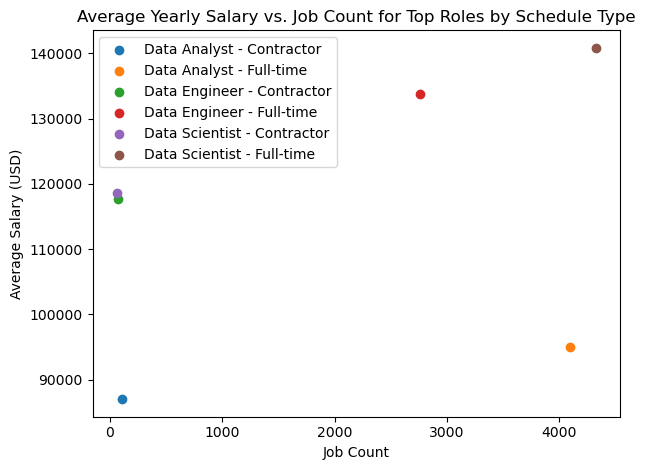

In [95]:
#job_stats.plot(kind='scatter', x='job_count', y='average_salary')

# Plot using plt.scatter()
for job_title_type in job_stats['job_title_type'].unique():
 subset = job_stats[job_stats['job_title_type'] == job_title_type]
 plt.scatter(subset['job_count'], subset['average_salary'], label=job_title_type)

plt.ylabel('Average Salary (USD)')
plt.xlabel('Job Count')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()

#need to create a loop for lables in the plot
#for i, txt in enumerate(job_stats.index):
#   plt.text(job_stats['job_count'].iloc[i], job_stats['average_salary'].iloc[i], txt, ha='center', va='bottom')


plt.tight_layout()
plt.show()

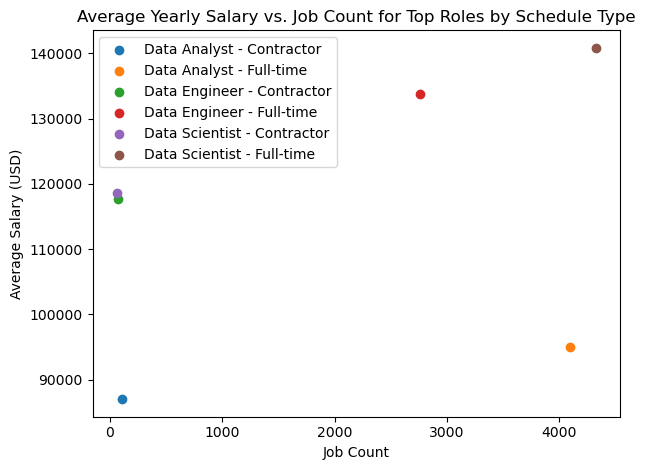

In [120]:


for i, txt in enumerate(job_stats.index):
   plt.scatter(job_stats['job_count'].iloc[i], job_stats['average_salary'].iloc[i], label=txt)

plt.ylabel('Average Salary (USD)')
plt.xlabel('Job Count')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
#plt.legend(title='job_title_type')
plt.legend()

plt.tight_layout()
plt.show()

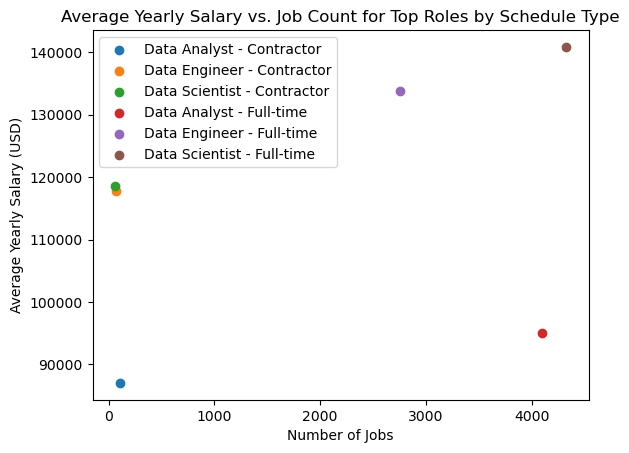

In [73]:
#Final Solution:

# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
 (df['job_country'] == 'United States') &
 (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
 (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
 mean_salary_year_avg=('salary_year_avg', 'mean'),
 job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
 subset = stats[stats['job_title_type'] == job_title_type]
 plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()

In [86]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
 (df['job_country'] == 'United States') &
 (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
 (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
 mean_salary_year_avg=('salary_year_avg', 'mean'),
 job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

stats

,job_schedule_type,job_title_short,mean_salary_year_avg,job_count,job_title_type
0,Contractor,Data Analyst,87027.197142,111,Data Analyst - Contractor
1,Contractor,Data Engineer,117772.326225,74,Data Engineer - Contractor
2,Contractor,Data Scientist,118568.074155,61,Data Scientist - Contractor
3,Full-time,Data Analyst,95072.545202,4097,Data Analyst - Full-time
4,Full-time,Data Engineer,133804.432239,2759,Data Engineer - Full-time
5,Full-time,Data Scientist,140848.379828,4325,Data Scientist - Full-time


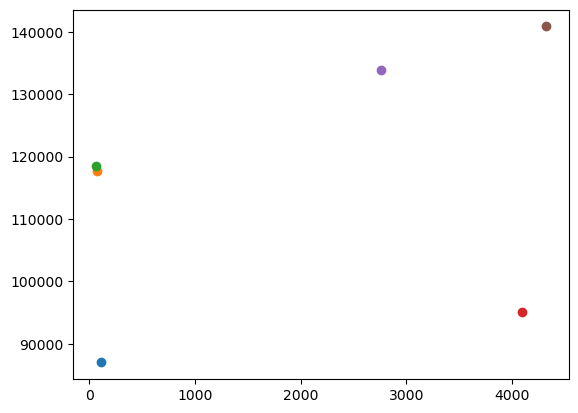

In [87]:
# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
 subset = stats[stats['job_title_type'] == job_title_type]
 plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

#TESTING BELOW#

In [121]:
#after the group by, we have the following:
job_stats

,average_salary,job_count
job_title_type,,
Data Analyst - Contractor,87027.197142,111
Data Analyst - Full-time,95072.545202,4097
Data Engineer - Contractor,117772.326225,74
Data Engineer - Full-time,133804.432239,2759
Data Scientist - Contractor,118568.074155,61
Data Scientist - Full-time,140848.379828,4325


In [181]:
for i in enumerate(job_stats):
    print(i)

(0, 'average_salary')
(1, 'job_count')


In [182]:
for i, txt in enumerate(job_stats.values):
    print(i, txt)

0 [87027.19714245   111.        ]
1 [95072.54520171  4097.        ]
2 [1.17772326e+05 7.40000000e+01]
3 [133804.43223881   2759.        ]
4 [1.18568074e+05 6.10000000e+01]
5 [140848.3798284   4325.       ]


In [183]:
for i, txt in enumerate(job_stats.index):
    print(i, txt)

0 Data Analyst - Contractor
1 Data Analyst - Full-time
2 Data Engineer - Contractor
3 Data Engineer - Full-time
4 Data Scientist - Contractor
5 Data Scientist - Full-time


In [187]:
for i, job_title in enumerate(job_stats.index):
    job_count = job_stats['job_count'].iloc[i]
    #print(f'Index: {job_title}, Job Count: {job_count}')
    print(i, job_title, job_count)

0 Data Analyst - Contractor 111
1 Data Analyst - Full-time 4097
2 Data Engineer - Contractor 74
3 Data Engineer - Full-time 2759
4 Data Scientist - Contractor 61
5 Data Scientist - Full-time 4325


In [189]:
for i, job_title in enumerate(job_stats.index):
    job_count = job_stats['job_count'].iloc[i]
    average_salary = job_stats['average_salary'].iloc[i]
    #print(f'Index: {job_title}, Job Count: {job_count}')
    print(i, job_title, job_count, average_salary)

0 Data Analyst - Contractor 111 87027.19714245496
1 Data Analyst - Full-time 4097 95072.54520171009
2 Data Engineer - Contractor 74 117772.32622466216
3 Data Engineer - Full-time 2759 133804.43223880936
4 Data Scientist - Contractor 61 118568.07415471312
5 Data Scientist - Full-time 4325 140848.37982839596


In [190]:
# Reset the index to make plotting easier
job_stats.reset_index(inplace=True) #reset the index makes it easier to plot since it is a number and no longer the label of job_title_type


job_stats

,job_title_type,average_salary,job_count
0,Data Analyst - Contractor,87027.197142,111
1,Data Analyst - Full-time,95072.545202,4097
2,Data Engineer - Contractor,117772.326225,74
3,Data Engineer - Full-time,133804.432239,2759
4,Data Scientist - Contractor,118568.074155,61
5,Data Scientist - Full-time,140848.379828,4325


In [191]:
job_stats.index

RangeIndex(start=0, stop=6, step=1)

In [199]:
for i, job in enumerate(job_stats.index):
    job_title_type = job_stats['job_title_type'].iloc[i]
    job_count = job_stats['job_count'].iloc[i]
    average_salary = job_stats['average_salary'].iloc[i]
    print(i, job_title_type, job_count, average_salary)
    #print(i, job_title_type, job_count, average_salary)

0 Data Analyst - Contractor 111 87027.19714245496
1 Data Analyst - Full-time 4097 95072.54520171009
2 Data Engineer - Contractor 74 117772.32622466216
3 Data Engineer - Full-time 2759 133804.43223880936
4 Data Scientist - Contractor 61 118568.07415471312
5 Data Scientist - Full-time 4325 140848.37982839596


In [200]:
for i, job in enumerate(job_stats.index):
    #job_title_type = job_stats['job_title_type'].iloc[i]
    job_count = job_stats['job_count'].iloc[i]
    average_salary = job_stats['average_salary'].iloc[i]
    print(i, job_count, average_salary)
    #print(i, job_title_type, job_count, average_salary)

0 111 87027.19714245496
1 4097 95072.54520171009
2 74 117772.32622466216
3 2759 133804.43223880936
4 61 118568.07415471312
5 4325 140848.37982839596


In [205]:
for i, col in enumerate(job_stats.index):
    job_count = job_stats['job_count'].iloc[i]  # This will give an error
    average_salary = job_stats['average_salary'].iloc[i]
    print(f"Index: {i}, Job Count: {job_count}, Average Salary: {average_salary}")

Index: 0, Job Count: 111, Average Salary: 87027.19714245496
Index: 1, Job Count: 4097, Average Salary: 95072.54520171009
Index: 2, Job Count: 74, Average Salary: 117772.32622466216
Index: 3, Job Count: 2759, Average Salary: 133804.43223880936
Index: 4, Job Count: 61, Average Salary: 118568.07415471312
Index: 5, Job Count: 4325, Average Salary: 140848.37982839596
